In [1]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as col
import matplotlib.cm as cm
from scipy import stats
from datetime import datetime

In [ ]:
#The target of project is to finge out the relationship between daily payment and household siutation.
# the data is collected from https://www.stats.govt.nz/large-datasets/csv-files-for-download/

In [ ]:
#household siutation data 
# get groups of the yearly average data of household for total, owned, rented, free. 
#the data is from https://www.stats.govt.nz/assets/Uploads/Dwelling-and-household-estimates/Dwelling-and-household-estimates-September-2019-quarter/Download-data/dwelling-and-household-estimates-september-2019-quarter-csv.zip

In [2]:
def get_year_str2(datestr):
    dt = datetime.strptime(datestr, '%d %b %Y')
    ss = dt.strftime("%Y.%m")
    return ss

get_year_str2('30 Jun 2017')

'2017.06'

In [3]:
df2 = pd.read_csv('data/dwellings-sep-2019-csv.csv')
df2.head()
#check dwelling of owner_occupied, rented, free, total
dtotal = df2[(df2['tenure']== 'total') & (df2['estimate_type']== 'as at')]
drent = df2[(df2['tenure']== 'rented') & (df2['estimate_type']== 'as at')]
dfree = df2[(df2['tenure']== 'free') & (df2['estimate_type']== 'as at')]
downed = df2[(df2['tenure']== 'owner_occupied') & (df2['estimate_type']== 'as at')]

#change the date in these tables to the same format in the other table
dtotal['date']= dtotal['date'].apply(lambda x: get_year_str2(x))
drent['date']= drent['date'].apply(lambda x: get_year_str2(x))
dfree['date']= dfree['date'].apply(lambda x: get_year_str2(x))
downed['date']= downed['date'].apply(lambda x: get_year_str2(x))


C:\Users\beizhang\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\beizhang\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\beizhang\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:12

In [4]:
#hourly earnings of IT industory
# whole, male and female
# data is from https://www.stats.govt.nz/assets/Uploads/Labour-market-statistics/Labour-market-statistics-September-2019-quarter/Download-data/labour-market-statistics-september-2019-quarter-csv.zip
d = pd.read_csv('data/qes-sep19qtr-csv.csv')
d = d[(d['Series_title_1'] == 'Information Media and Telecommunications')]
d = d[(d['Series_title_3'] == 'Ordinary Time Hourly')]
d = d.drop(['Series_reference', 'STATUS','UNITS','MAGNTUDE','Subject','Group','Series_title_3','Series_title_4','Series_title_5'], axis=1)
d = d.dropna()

dmale = d[(d['Series_title_2'] == 'Male')]
dfemale = d[(d['Series_title_2'] == 'Female')]
davg = d[(d['Series_title_2'] == 'Total Both Sexes')]

#remove the 1989,1990,1991 which are not included in anther piece of data compared with
dfemale = dfemale[~dfemale['Period'].isin([1989.03,1990.03,1989.06,1990.06,1989.09,1990.09,1989.12,1990.12])]
dmale = dmale[~dmale['Period'].isin([1989.03,1990.03,1989.06,1990.06,1989.09,1990.09,1989.12,1990.12])]
davg = davg[~davg['Period'].isin([1989.03,1990.03,1989.06,1990.06,1989.09,1990.09,1989.12,1990.12])]


C:\Users\beizhang\AppData\Local\Continuum\anaconda3\envs\tensorflow_cpu\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<IPython.core.display.Javascript object>


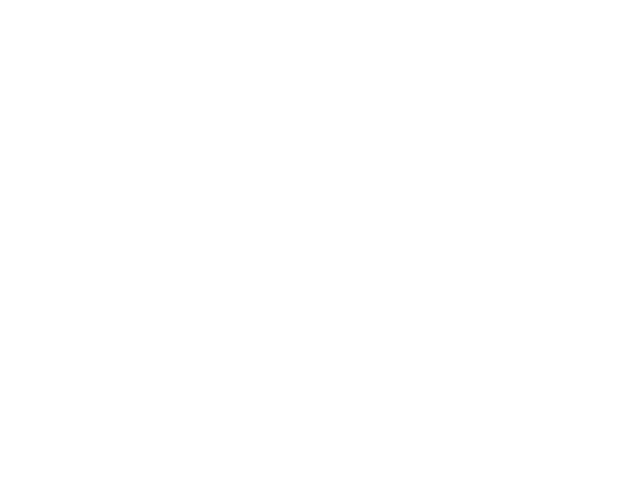

<IPython.core.display.Javascript object>


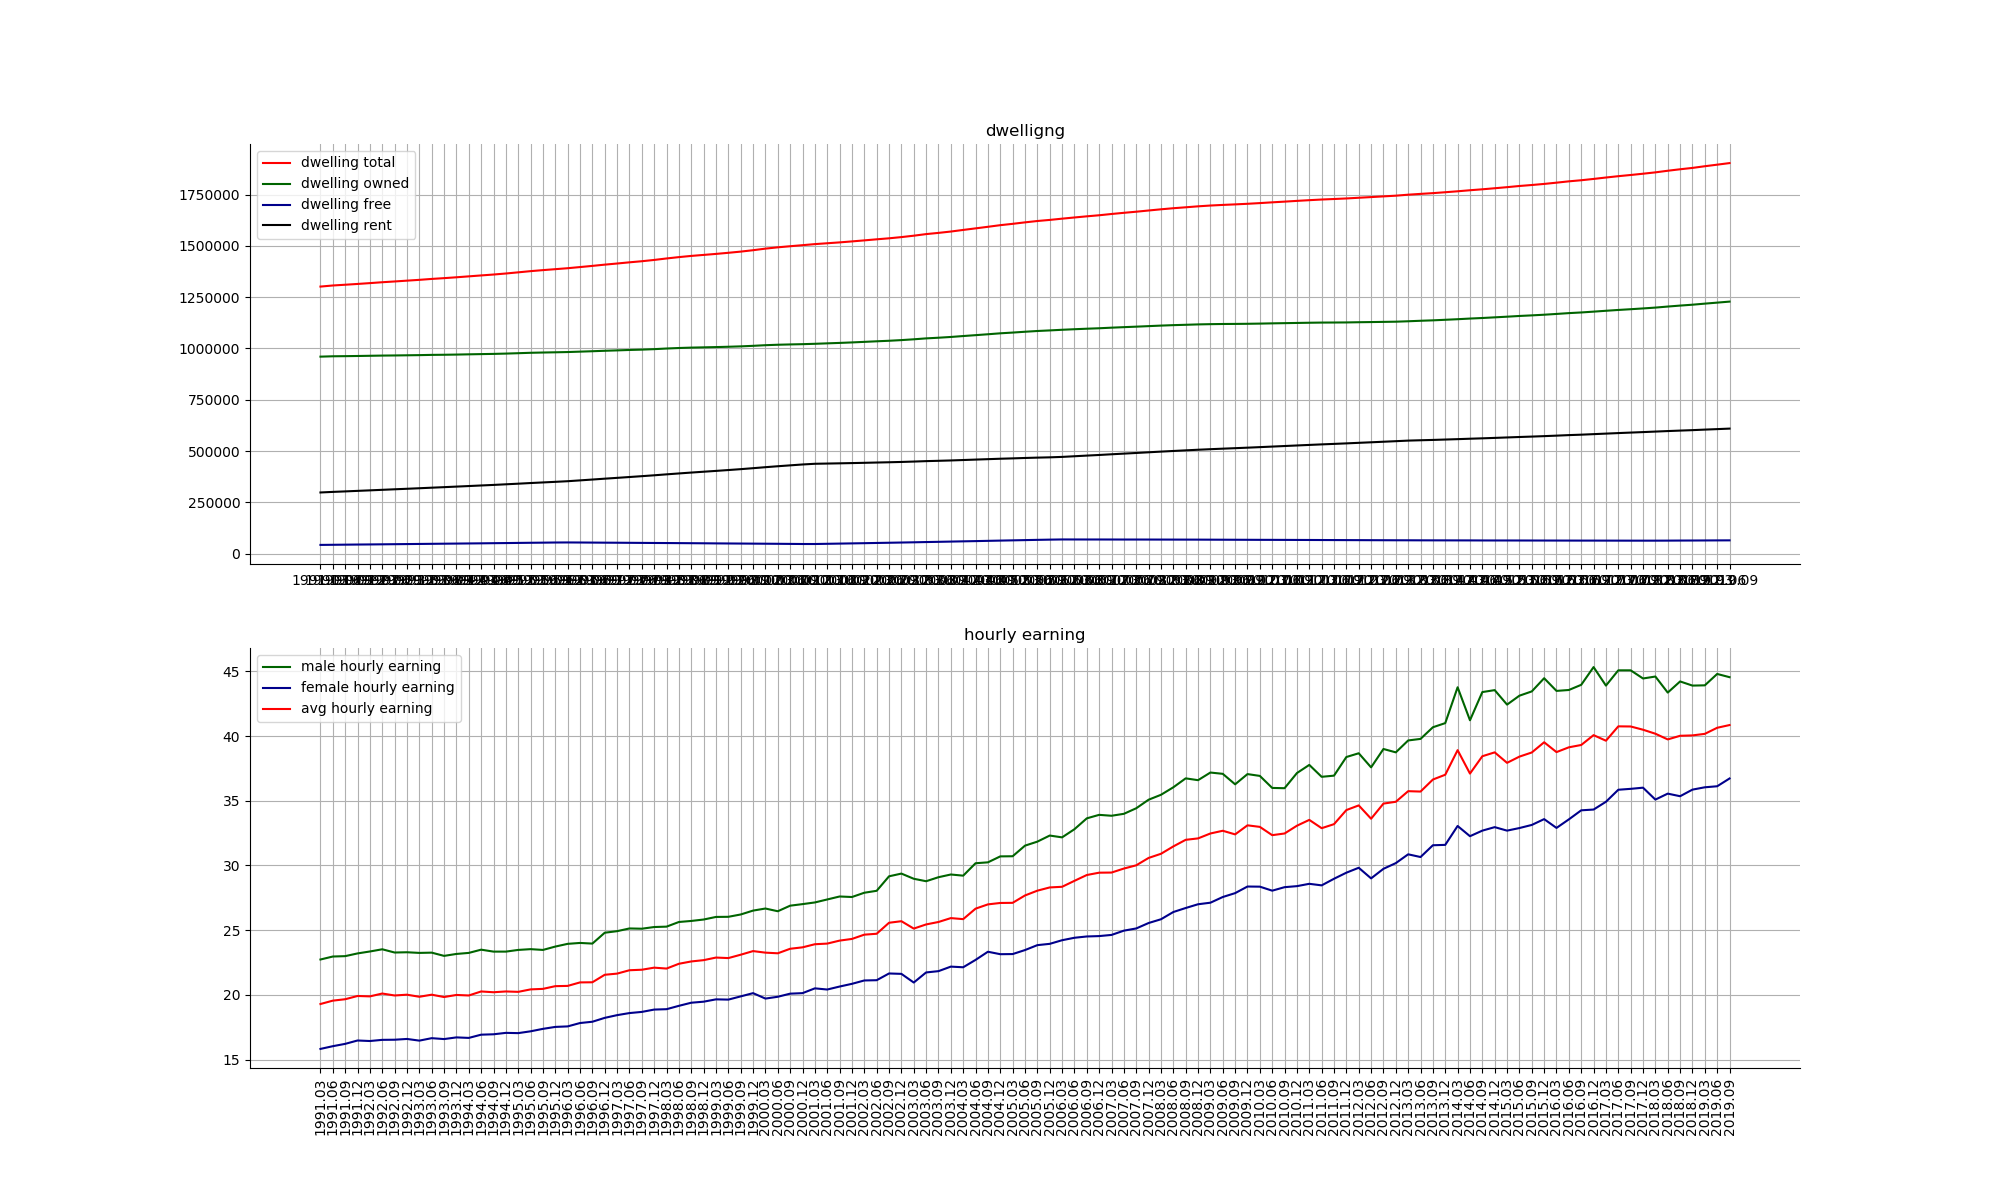

In [6]:
plt.figure()
fig = plt.figure(figsize=(20,12));
#fig = plt.figure();
#ax1, ax2 = plt.subplots(1,2,sharex=True) 
ax1 = plt.subplot(211)
ax1.grid(True)
#ax1.set_xticklabels([])
year = dtotal['date']

plt.plot(year,dtotal['private_dwellings'],'k', label='dwelling total',color='red')
plt.plot(year,downed['private_dwellings'],'k',label='dwelling owned',color='darkgreen')
plt.plot(year,dfree['private_dwellings'],'k', label='dwelling free',color='darkblue')
plt.plot(year,drent['private_dwellings'],'k',label='dwelling rent',color='black')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.title('dwelligng')

ax2 = plt.subplot(212, sharex=ax1)
ax2.grid(True)
plt.plot(year,dmale['Data_value'],'k', label='male hourly earning',color='darkgreen')
plt.plot(year,dfemale['Data_value'],'k',label='female hourly earning',color='darkblue')
plt.plot(year,davg['Data_value'],'k',label='avg hourly earning',color='red')
#ax2.tick_params(axis='y')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.title('hourly earning')
ax2.set_xticklabels(davg['Period'])
plt.xticks(rotation = 90)
plt.show()
plt.savefig("w4-project.png")